In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from scipy import stats

In [2]:
pd.set_option('display.max.columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

### Brazilian E-Commerce Public Dataset by Olist

In [1]:
# Ссылка на набор данных: https://www.kaggle.com/olistbr/brazilian-ecommerce

#### Customers

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Пропуски в данных отсутствуют
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


* **customer_id** - идентификатор клиента, уникальный для каждого заказа
* **customer_unique_id** - уникальный идентификатор клиента
* **customer_zip_code_prefix** - первые пять цифр почтового индекса клиента
* **customer_city** - название города клиента
* **customer_state** - сокр. название штата клиента

In [100]:
# Кол-во уникальных значений и наиболее частотные значения переменных:
customers.describe(include = object)
# Уникальных покупателей: 96096 (небольшая разница с customer_id может свидетельствовать о малом кол-ве повторных покупок)
# Покупателями магазина являются жители всех субъектов страны (26 штатов и одного фед. округа); 4119 городов
# Больше всего покупателей из штата Сан-Паулу и одноименного города этого штата
# Покупатель с id = 8d50f5eadf50201ccdcedfb9e2ac8455 сделал больше всех заказов (17)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,38878f4361fc8d5714ca1820791b1320,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [95]:
# Распределение покупателей по штатам
state_of_customers = customers.groupby(['customer_state']).count()['customer_unique_id'].sort_values(ascending=False).reset_index()
state_of_customers['percentage'] = state_of_customers['customer_unique_id']/state_of_customers['customer_unique_id'].sum()*100
# customers['customer_state'].value_counts()
# customers['customer_state'].value_counts(normalize = True)

In [96]:
# 90% покупателей приходится на 10 субъектов страны, причем 42% - на Сан-Паулу
state_of_customers.head(10)

,customer_state,customer_unique_id,percentage
0,SP,41746,42.0
1,RJ,12852,12.9
2,MG,11635,11.7
3,RS,5466,5.5
4,PR,5045,5.1
5,SC,3637,3.7
6,BA,3380,3.4
7,DF,2140,2.2
8,ES,2033,2.0
9,GO,2020,2.0


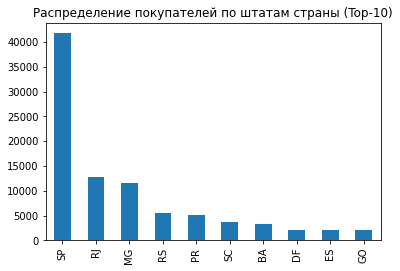

In [83]:
customers['customer_state'].value_counts().head(10).plot.bar(title='Распределение покупателей по штатам страны (Top-10)')
plt.show()

In [97]:
# Распределение покупателей по городам
city_of_customers = customers.groupby(['customer_city']).count()['customer_unique_id'].sort_values(ascending=False).reset_index()
city_of_customers['percentage'] = city_of_customers['customer_unique_id']/city_of_customers['customer_unique_id'].sum()*100

In [98]:
# Основная часть покупателей - 16% - из Сан-Паулу (одноименный штату город)
city_of_customers.head(10)

,customer_city,customer_unique_id,percentage
0,sao paulo,15540,15.6
1,rio de janeiro,6882,6.9
2,belo horizonte,2773,2.8
3,brasilia,2131,2.1
4,curitiba,1521,1.5
5,campinas,1444,1.5
6,porto alegre,1379,1.4
7,salvador,1245,1.3
8,guarulhos,1189,1.2
9,sao bernardo do campo,938,0.9


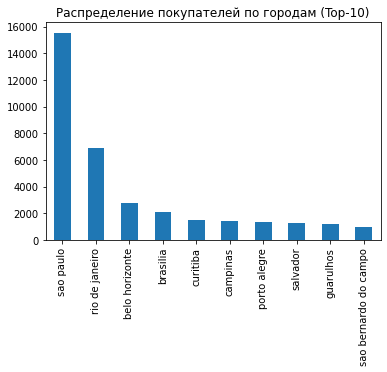

In [99]:
customers['customer_city'].value_counts().head(10).plot.bar(title="Распределение покупателей по городам (Top-10)")
plt.show()

In [147]:
# Посчитаем кол-во заказов для каждого покупателя за период (без учета статуса, который хранится в др. таблице)
num_of_purchases = customers.groupby(['customer_unique_id']).count()[['customer_id']].reset_index().\
    rename(columns={'customer_id': 'num_purchases'})

In [148]:
num_of_purchases.sort_values('num_purchases', ascending=False)

,customer_unique_id,num_purchases
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


In [134]:
# Заказы ведущего покупателя
# customers.loc[(customers['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455')]

In [117]:
# Считаем кол-во покупателей по числу заказов
freq = num_of_purchases.groupby(['num_purchases']).count().reset_index().rename(columns={'customer_unique_id': 'num_customers'})
# freq = num_of_purchases['num_purchases'].value_counts()
# freq

In [118]:
# Подавляющее большинство покупателей - 97% - совершило только одну покупку за период
freq['percentage'] = freq['num_customers'] / freq['num_customers'].sum()*100
freq

,num_purchases,num_customers,percentage
0,1,93099,96.9
1,2,2745,2.9
2,3,203,0.2
3,4,30,0.0
4,5,8,0.0
5,6,6,0.0
6,7,3,0.0
7,9,1,0.0
8,17,1,0.0


In [55]:
# Дубли записей отсутствуют 
customers.duplicated().sum()

0

#### Geolocation

In [4]:
geo = pd.read_csv('olist_geolocation_dataset.csv')

In [6]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [119]:
# Пропуски в данных отсутствуют
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


* **geolocation_zip_code_prefix** - первые 5 цифр почтового индекса
* **geolocation_lat** - широта
* **geolocation_lng** - долгота
* **geolocation_city** - название города
* **geolocation_state** - сокр. название штата

In [5]:
# Кол-во уникальных названий городов и штатов:
print(geo['geolocation_city'].nunique())
print(geo['geolocation_state'].nunique())

8011
27


In [54]:
# Кол-во дублей записей
geo.duplicated().sum()

261831

In [138]:
# Сами дубли
geo_du = geo.groupby(geo.columns.tolist()).size().reset_index().rename(columns={0:'duplicates'})
geo_du.sort_values('duplicates', ascending=False).head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,duplicates
666533,88220,-27.1,-48.6,itapema,SC,314
98045,6414,-23.5,-46.9,barueri,SP,189
98076,6414,-23.5,-46.9,barueri,SP,127
73118,5145,-23.5,-46.7,sao paulo,SP,126
312550,22620,-23.0,-43.4,rio de janeiro,RJ,102
314707,22775,-23.0,-43.4,rio de janeiro,RJ,89
312992,22640,-23.0,-43.3,rio de janeiro,RJ,89
97594,6401,-23.5,-46.9,barueri,SP,81
571358,71936,-15.8,-48.0,brasilia,DF,80
379955,30240,-19.9,-43.9,belo horizonte,MG,79


#### Order items

In [5]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [16]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [26]:
# Пропуски в данных отсутствуют
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


* **order_id** - уникальный идентификатор заказа
* **order_item_id** - порядковый номер (по сути, номер места в заказе), идентифицирующий количество элементов, включенных в один и тот же заказ
* **product_id** - уникальный идентификатор продукта
* **seller_id** - уникальный идентификатор продавца
* **shipping_limit_date** - предельная дата отгрузки заказа для передачи его логистическому партнеру
* **price** - цена товара
* **freight_value** - стоимость фрахта товара (если заказ содержит более одного товара, то стоимость фрахта разделяется между товарами)

In [149]:
# Кол-во уникальных значений и наиболее частотные значения переменных:
# order_items.describe(include = object)
order_items[['order_id', 'product_id', 'seller_id']].describe()
# Уникальных заказов: 98666
# Уникальных продуктов в заказах: 32951
# Уникальных продавцов: 3095
# Самый большой по кол-ву мест заказ насчитывает 21 позицию
# Больше всего заказывали товар с id = aca2eb7d00ea1a7b8ebd4e68314663af (527 раз)

# Ведущим продавцом по кол-ву заказов является продавец с id = 6560211a19b47992c3666cc44a7e94c0 (2033 заказов)

,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


In [178]:
# Цена на один и тот же товар (на примере топового) может заметно отличаться 
# top_product_id = order_items.loc[(order_items['product_id'] == 'aca2eb7d00ea1a7b8ebd4e68314663af')]
# top_product_id[['price']].describe()
# order_items.loc[(order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef')]
# order_items.loc[(order_items['seller_id'] == '6560211a19b47992c3666cc44a7e94c0')]

In [3]:
# Статистика по количественным переменным
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


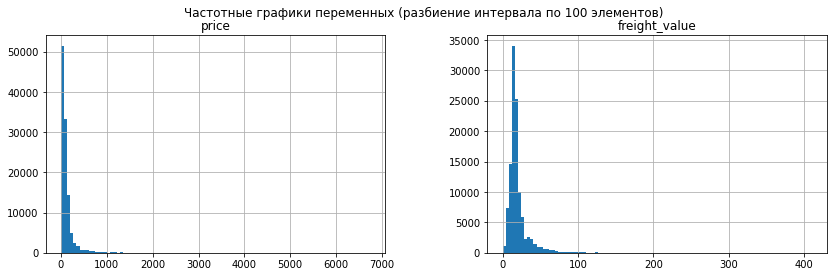

In [9]:
# Построим гистограммы распределения для двух количественных переменных
# Для обех переменных распределение похоже на логнормальное (натуральный логарифм таких им. нормальное распределение)
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items[['price']].hist('price', bins=100, ax=axes[0])
order_items[['freight_value']].hist('freight_value', bins=100, ax=axes[1])
fig.suptitle('Частотные графики переменных (разбиение интервала по 100 элементов)', fontsize=12)
plt.show()

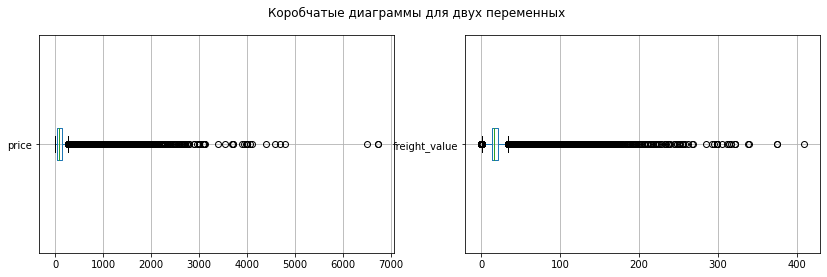

In [183]:
# И графики box plot
fig, axes = plt.subplots(1, 2, figsize=(14,4))
order_items[['price']].boxplot(rot=0, ax=axes[0], vert=False)
order_items[['freight_value']].boxplot(rot=0, ax=axes[1], vert=False)
fig.suptitle('Коробчатые диаграммы для двух переменных', fontsize=12)
plt.show()

In [126]:
# Рейтинг продавцов по кол-ву заказов
order_items['seller_id'].value_counts()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
003554e2dce176b5555353e4f3555ac8       1
1703bc09972dab9782e7a9194943b69f       1
a663d9c3797e90eac99ff60939416a56       1
d9c349beabc06aa6ff1c6d68b5e9e22e       1
a61cc04793308395a840807104365121       1
Name: seller_id, Length: 3095, dtype: int64

In [7]:
# Распределение заказов по кол-ву мест в них
order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [14]:
# Рейтинг продуктов по кол-ву заказов
order_items['product_id'].value_counts().head(10)
# order_items['product_id'].value_counts().head(10).plot.bar(title='Рейтинг продуктов по кол-ву заказов (Top-10)')

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

In [ ]:
# Посмотрим разброс значений цен товаров и стоимости доставки
# в общем случае цены зависят от категории, стоимость доставки зависит от расстояния и весо-габаритных характеристик товаров

In [17]:
# Стоимость товаров
price_var = order_items.groupby('product_id')\
    .agg(['std', stats.variation, 'min', 'max', np.ptp, 'count'])[['price']].reset_index()
# ptp - размах
# std - среднее квадратическое отклонение (стандартное отклонение)
# stats.variation - коэфф. вариации (считается по точной формуле, а не как std / mean)

In [18]:
price_var.sort_values(('price','ptp'), ascending=False) #сортировка по размаху значений
# price_var.sort_values(('price','count'), ascending=False)

product_id price                                \
                                          std variation    min    max   ptp   
17902  8b502ca34e28d30605bc667b965b6abf 706.5       0.2 1999.9 2999.0 999.1   
32613  fd8a5b9a8a79d7ba0739d69be5dc5aa1 553.7       0.4  616.0 1399.0 783.0   
10670  5237739bb5fee495dbd337755a138660 195.2       0.2  809.0 1549.0 740.0   
23927  ba3fea9ec13fb882dda6c9e4295d9130 505.7       0.2 1084.9 1800.0 715.1   
23901  ba16581014183c8415da15145f3d4c24 467.4       0.5  299.0  960.0 661.0   
...                                 ...   ...       ...    ...    ...   ...   
12065  5cf189f48af24c605a16bcdb701df823   nan       0.0   65.9   65.9   0.0   
12064  5cebe3c91f03e5d52a1951b3ce8354cd   nan       0.0   64.0   64.0   0.0   
12063  5ceafdc1d838f693f92b8c2d8c3bdc86   0.0       0.0   20.0   20.0   0.0   
12062  5ce6a6914bbb228f4cb4ee93c1cd0d15   0.0       0.0  350.0  350.0   0.0   
32950  fffe9eeff12fcbd74a2f2b007dde0c58   nan       0.0  250.0  250.0   0.0   

             
      count  
17902     2  
32613     2  
10670    13  
23927     2  
23901     2  
...     ...  
12065     1  
12064     1  
12063     4  
12062     2  
32950     1  

[32951 rows x 7 columns]

In [19]:
# Стоимость доставки
var_freight_value = order_items.groupby('product_id')\
    .agg(['std', stats.variation, 'min', 'max', np.ptp, 'count'])[['freight_value']].reset_index()

In [20]:
var_freight_value.sort_values(('freight_value','ptp'), ascending=False) #сортировка по размаху значений
# var_freight_value.sort_values(('freight_value','count'), ascending=False)

product_id freight_value                        \
                                                  std variation   min   max   
5556   2a34e0af5f72ca6cdeb148377a247c86         128.3       0.8   0.0 256.1   
3863   1d16c0509e7011656e03c6a582ff6667         101.6       0.6  58.9 312.4   
3005   16c4e87b98a9370a9cbc3a4658a3f45b          69.1       0.5  63.2 284.6   
28428  dc861f18267cce21f3b70f9f7990b8ce         150.9       0.5 100.7 314.0   
12744  62953ad36e6c894ce69fc72d9a5246f3         101.2       1.2  12.2 224.3   
...                                 ...           ...       ...   ...   ...   
13520  687686c6408c9389febfde350b99c82c           nan       0.0  17.5  17.5   
13518  687578da8cc5f5b3da7d328a5aebadf7           nan       0.0  28.0  28.0   
13516  68749ef9499d72290629ec3f71596d34           nan       0.0  34.3  34.3   
13512  686b869ed0d827fa346e8ca87a54d0e8           nan       0.0  17.7  17.7   
32950  fffe9eeff12fcbd74a2f2b007dde0c58           nan       0.0  53.9  53.9   

                   
        ptp count  
5556  256.1     3  
3863  253.5     7  
3005  221.4    13  
28428 213.3     2  
12744 212.1     4  
...     ...   ...  
13520   0.0     1  
13518   0.0     1  
13516   0.0     1  
13512   0.0     1  
32950   0.0     1  

[32951 rows x 7 columns]

In [4]:
# len(price_var.loc[price_var['price']['variation'] >= 0.33])
# len(var_freight_value.loc[var_freight_value['freight_value']['variation'] >= 0.33])
# Целесообразность такого анализа даже для нормального распределения подвергается сомнению

In [23]:
# Пример расчета суммы стоимости и доставки по заказам:
# отберем конкретных 2 заказа (в каждом по 4 позиции (столбец order_item_id)):
two = order_items[order_items['order_id'].isin(['00bcee890eba57a9767c7b5ca12d3a1b', '00f1cc7439ccb8671133776d1829faf5'])]
two

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
296,00bcee890eba57a9767c7b5ca12d3a1b,1,6c90c0f6c2d89eb816b9e205b9d6a36a,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.5,15.8
297,00bcee890eba57a9767c7b5ca12d3a1b,2,b7d94dc0640c7025dc8e3b46b52d8239,9c0e69c7bf2619675bbadf47b43f655a,2017-07-26 21:05:07,175.9,52.7
298,00bcee890eba57a9767c7b5ca12d3a1b,3,d143bf43abb18593fa8ed20cc990ae84,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.5,15.8
299,00bcee890eba57a9767c7b5ca12d3a1b,4,55939df5d8d2b853fbc532bf8a00dc32,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.5,15.8
386,00f1cc7439ccb8671133776d1829faf5,1,2fd91ba79b5f4f8342b67bd79cb54b3f,a673821011d0cec28146ea42f5ab767f,2017-11-30 03:12:39,35.0,9.3
387,00f1cc7439ccb8671133776d1829faf5,2,2fd91ba79b5f4f8342b67bd79cb54b3f,a673821011d0cec28146ea42f5ab767f,2017-11-30 03:12:39,35.0,9.3
388,00f1cc7439ccb8671133776d1829faf5,3,2fd91ba79b5f4f8342b67bd79cb54b3f,a673821011d0cec28146ea42f5ab767f,2017-11-30 03:12:39,35.0,9.3
389,00f1cc7439ccb8671133776d1829faf5,4,2fd91ba79b5f4f8342b67bd79cb54b3f,a673821011d0cec28146ea42f5ab767f,2017-11-30 03:12:39,35.0,9.3


In [34]:
two_ = two.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
two_['total'] = two_.sum(axis=1)
two_

,order_id,price,freight_value,total
0,00bcee890eba57a9767c7b5ca12d3a1b,672.4,100.1,772.5
1,00f1cc7439ccb8671133776d1829faf5,140.0,37.4,177.3


In [184]:
# Дубли записей отсутствуют
order_items.duplicated().sum()

0

#### Order payments

In [6]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [12]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [36]:
# Пропуски в данных отсутствуют
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


* **order_id** - уникальный идентификатор заказа
* **payment_sequential** - номер способа оплаты (номер платежа)
* **payment_type** - способ оплаты заказчиком
* **payment_installments** - кол-во рассрочек, выбранных заказчиком
* **payment_value** - стоимость транзакции (сделки)

In [37]:
# Кол-во уникальных значений и наиболее частотные значения переменных:
order_payments.describe(include = object)
# Уникальных заказов с платежами: 99440
# Уникальных способов оплаты: 5
# Самый популярный способ оплаты по кол-ву заказов: кредитная карта
# Больше всего платежей (29) было по заказу с id = fa65dad1b0e818e3ccc5cb0e39231352

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [39]:
# order_payments.loc[(order_payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352')]

In [45]:
# Статистика по значениям количественных переменных:
order_payments.describe()
# Среднее значение транзакции: 154,1 бразильских реала (BRL) - по одному заказу может быть несколько способов оплаты (см. ниже). 

,payment_sequential,payment_installments,payment_value
count,103886.0,103886.0,103886.0
mean,1.1,2.9,154.1
std,0.7,2.7,217.5
min,1.0,0.0,0.0
25%,1.0,1.0,56.8
50%,1.0,1.0,100.0
75%,1.0,4.0,171.8
max,29.0,24.0,13664.1


In [26]:
# Распределение заказов по способу оплаты:
# В 3-ех случаях способ оплаты не определен
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

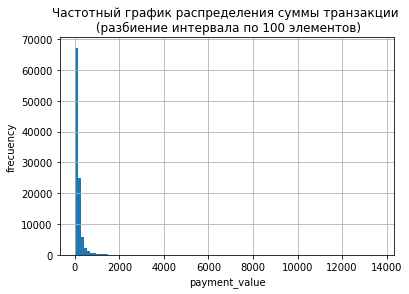

In [70]:
# распределение переменной 
n, bins, patches = plt.hist(order_payments['payment_value'], 100)

plt.xlabel('payment_value')
plt.ylabel('frecuency')
plt.title('Частотный график распределения суммы транзакции \n (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# box plot

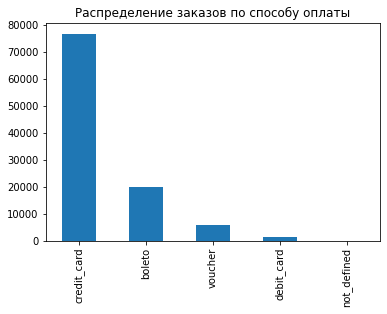

In [42]:
order_payments['payment_type'].value_counts().plot.bar(title='Распределение заказов по способу оплаты')
plt.show()

In [68]:
# Суммируем платежи по видам используемых способов оплаты
# order_payments.groupby('payment_type')['payment_value'].sum()
order_payments.groupby('payment_type')['payment_value'].agg(['sum', 'count']).reset_index().sort_values('sum', ascending=False)

,payment_type,sum,count
1,credit_card,12542084.2,76795
0,boleto,2869361.3,19784
4,voucher,379436.9,5775
2,debit_card,217989.8,1529
3,not_defined,0.0,3


In [43]:
# Заказы, для которых неопределен способ оплаты:
order_payments[order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [65]:
# Заказы с несколькими способами оплаты:
# order_payments[order_payments['payment_sequential'] >= 2].sort_values((['payment_sequential','order_id']), ascending=True)
# order_payments.query('payment_sequential >= 2')

In [49]:
# Один из примеров подобных платежей (2 транзакции):
order_payments.loc[(order_payments['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.2
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.4


In [33]:
# Из two (2 заказа), для контроля соответствия фактического платежа стоимости заказа
order_payments.loc[(order_payments['order_id'] == '00bcee890eba57a9767c7b5ca12d3a1b') | \
                   (order_payments['order_id'] == '00f1cc7439ccb8671133776d1829faf5')]


,order_id,payment_sequential,payment_type,payment_installments,payment_value
10741,00bcee890eba57a9767c7b5ca12d3a1b,1,credit_card,10,772.50
65516,00f1cc7439ccb8671133776d1829faf5,1,boleto,1,177.32


In [71]:
# Кол-во транзакций по каждому заказу:
order_payments['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
b3aa45b7ba0f950a1b163a9f85f613de     1
e4313fe2f9d83782c9426892dc497ea4     1
60b90d12b2451a3a055c8b86ad3478e3     1
f232f2ea81a3f61313f6bb0f759e624d     1
4934371ce23a4e29360d9a4284078a47     1
Name: order_id, Length: 99440, dtype: int64

In [56]:
# Дубли записей отсутствуют
order_payments.duplicated().sum()

0

#### Order reviews

In [7]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [74]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
# В данных есть пропуски (отсутствует более половины отзывов и большая часть заголовков)
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


* **review_id** - уникальный идентификатор отзыва
* **order_id** - уникальный идентификатор заказа
* **review_score** - оценка удовлетворенности клиента (от 1 до 5)
* **review_comment_title** - заголовок отзыва (на португальском)
* **review_comment_message** - сам отзыв (на португальском)
* **review_creation_date** - дата и время отправки клиенту опроса об удовлетворенности
* **review_answer_timestamp** -  дата и время отзыва (ответа на опрос)

In [81]:
# Кол-во уникальных значений и наиболее частотные значения переменных:
order_reviews.describe(include = object)
# Уникальных отзывов: 99173
# Есть заказы с разными отзывами и отзывы на несколько заказов (примеры ниже)

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,11715,41753,100000,100000
unique,99173,99441,4600,36921,637,99010
top,2172867fd5b1a55f98fe4608e1547b4b,03c939fd7fd3b38f8485a0f95798f1f6,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,426,230,466,4


In [99]:
# Средняя оценка удовлетворенности покупкой
print(f'Средняя оценка удовлетворенности покупкой: {(order_reviews.review_score.mean()):.1f}')
# Все отзывы содержат оценку. Средняя оценка удовлетворенности - 4,1
# order_reviews.describe()

Средняя оценка удовлетворенности покупкой: 4.1


In [65]:
# Распределение оценок удовлетворенности
order_reviews['review_score'].value_counts().sort_index(ascending=False)
# order_reviews['review_score'].value_counts(sort=False) # равнозначная предыдущей команда

5    57420
4    19200
3     8287
2     3235
1    11858
Name: review_score, dtype: int64

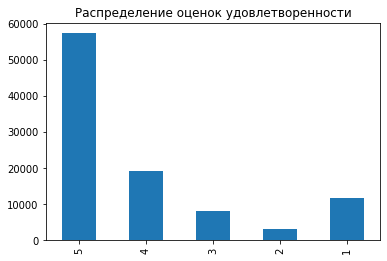

In [100]:
order_reviews['review_score'].value_counts().sort_index(ascending=False).plot.bar(title='Распределение оценок удовлетворенности')
plt.show()

In [94]:
# Пример отзыва на несколько заказов
order_reviews.loc[order_reviews['review_id'] == '2172867fd5b1a55f98fe4608e1547b4b']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15243,2172867fd5b1a55f98fe4608e1547b4b,559d606ac642899e44550f194fec7e08,5,NaN,Entrega no prazo e produto de qualidade!,2018-02-15 00:00:00,2018-02-26 15:53:18
28806,2172867fd5b1a55f98fe4608e1547b4b,ac6e61336e852cdc45fe59ada3763a66,5,NaN,Entrega no prazo e produto de qualidade!,2018-02-15 00:00:00,2018-02-26 15:53:18
54384,2172867fd5b1a55f98fe4608e1547b4b,e11ba7fd8fe0728dcd89efddcda9fb11,5,NaN,Entrega no prazo e produto de qualidade!,2018-02-15 00:00:00,2018-02-26 15:53:18


In [104]:
# Пример разных отзывов на один заказ (здесь для 2-ух заказов)
order_reviews[order_reviews['order_id'].isin(['559d606ac642899e44550f194fec7e08', '03c939fd7fd3b38f8485a0f95798f1f6'])]\
    .sort_values('order_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32
15243,2172867fd5b1a55f98fe4608e1547b4b,559d606ac642899e44550f194fec7e08,5,NaN,Entrega no prazo e produto de qualidade!,2018-02-15 00:00:00,2018-02-26 15:53:18
24270,e26865c2fff514ba41fb9306ebe81054,559d606ac642899e44550f194fec7e08,5,NaN,Entrega no prazo e produto de qualidade!,2018-02-15 00:00:00,2018-02-26 15:52:42


In [57]:
# Дубли записей отсутствуют
order_reviews.duplicated().sum()

0

#### Orders

In [8]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [18]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# В данных есть пропуски (поля: order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


* **order_id** - уникальный идентификатор заказа
* **customer_id** - идентификатор клиента, уникальный для каждого заказа
* **order_status** - статус заказа
* **order_purchase_timestamp** - дата и время покупки
* **order_approved_at** - дата и время подтверждения платежа
* **order_delivered_carrier_date** - дата и время передачи заказа в доставку (логистическому партнеру) 
* **order_delivered_customer_date** - фактические дата и время доставки заказа клиенту
* **order_estimated_delivery_date** - предполагаемая дата доставки, которая была сообщена клиенту в момент покупки

In [27]:
# Общее кол-во пропущенных значений по столбцам:
orders_missing_values = orders.isnull().sum()
orders_missing_values[orders_missing_values > 0]
# orders.isnull().sum()

order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

In [120]:
# Дата последнего заказа в датасете 
orders['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'

In [128]:
# Дата первого заказа
orders['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

In [69]:
# Распределение заказов по статусу:
orders['order_status'].value_counts()
# доставлено
# отгружено
# отменено (отмена осуществляется заказчиком)
# недоступно (отмена осуществляется продавцом)
# в обработке
# выставлен счет
# создан
# утвержден

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
# Отмененные заказы:
# orders[orders['order_status'].isin(['canceled', 'unavailable'])]

In [22]:
# Изменим форматирование дат на datetime:
date_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date',\
                'order_estimated_delivery_date']
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])
# orders.dtypes

In [21]:
# orders[date_columns].describe(datetime_is_numeric=True)

In [23]:
# Добавим столбцы с расчетными показателями:
# Фактическая длительность доставки
orders['duration_delivery'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp'])/24
orders['duration_delivery'] = orders['duration_delivery'].astype('timedelta64[h]')

# Ожидаемая длительность доставки (сообщается покупателю)
orders['expected_delivery'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp'])/24
orders['expected_delivery'] = orders['expected_delivery'].astype('timedelta64[h]')

# Разница в сроках ожидаемой и фактической доставки
orders['difference_timing'] = orders['expected_delivery'] - orders['duration_delivery']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duration_delivery,expected_delivery,difference_timing
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19.0,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26.0,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12.0,10.0


In [16]:
# Средние значения (в днях):
# ожидаемых сроков доставки
# фактических сроков доставки
# разницы между этими значениями
orders[['expected_delivery','duration_delivery', 'difference_timing']].mean()

expected_delivery   23.4
duration_delivery   12.1
difference_timing   11.3
dtype: float64

In [44]:
# Добавим столбцы для агрегации по периодам:
orders['order_purchase_year'] = orders.order_purchase_timestamp.apply(lambda x: x.year)
# orders['order_purchase_month'] = orders.order_purchase_timestamp.apply(lambda x: x.month)
# orders['year_month'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [47]:
# Средние значения (в днях) тех же показателей по годам:
to_year = orders.groupby(['order_purchase_year'], as_index=False).mean().\
    loc[:, ['order_purchase_year','expected_delivery','duration_delivery', 'difference_timing']]
to_year

,order_purchase_year,expected_delivery,duration_delivery,difference_timing
0,2016,54.5,19.2,35.8
1,2017,24.4,12.5,11.8
2,2018,22.4,11.7,10.7


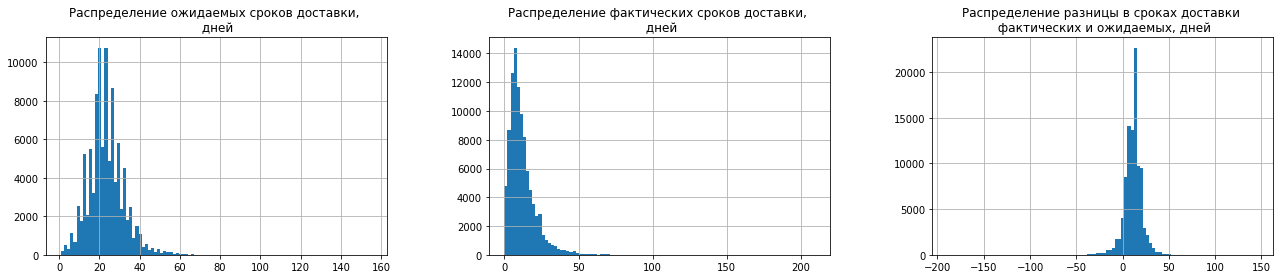

In [33]:
# Распределение длительности сроков доставки
# В большинстве случаев планируемые сроки доставки соблюдаются, хотя есть и исключения
fig, axes = plt.subplots(1, 3, figsize=(22, 4))
orders[['expected_delivery']].hist('expected_delivery', bins=100, ax=axes[0])
axes[0].set_title('Распределение ожидаемых сроков доставки, \n дней')

orders[['duration_delivery']].hist('duration_delivery', bins=100, ax=axes[1])
axes[1].set_title('Распределение фактических сроков доставки, \n дней')

orders[['difference_timing']].hist('difference_timing', bins=100, ax=axes[2])
axes[2].set_title('Распределение разницы в сроках доставки \n фактических и ожидаемых, дней')
# plt.suptitle('', y=1.1)
plt.show()

In [50]:
# Детальная статистика по срокам доставки:
orders[['expected_delivery','duration_delivery', 'difference_timing']].describe()

,expected_delivery,duration_delivery,difference_timing
count,99441.0,96476.0,96476.0
mean,23.4,12.1,11.3
std,8.8,9.6,10.2
min,1.0,0.0,-189.0
25%,18.0,6.0,7.0
50%,23.0,10.0,12.0
75%,28.0,15.0,16.0
max,155.0,209.0,146.0


In [ ]:
# Отберем уже доставленные заказы:
# delivered_orders = orders[orders['order_status'].isin(['delivered'])]

In [23]:
# Отберем актуальные заказы:
# actual_orders = orders[~orders['order_status'].isin(['canceled', 'unavailable'])]

In [12]:
# Среди них также есть отсутствующие значения (в тех же столбцах)
# missing_values = actual_orders.isnull().sum()
# missing_values[missing_values > 0]

In [13]:
# Статус заказов с отсутствующей датой и временем подтверждения платежа
# actual_orders[actual_orders['order_approved_at'].isnull()]['order_status'].value_counts()

In [14]:
# Статус заказов с отсутствующей датой и временем передачи заказа в доставку
# actual_orders[actual_orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

In [15]:
# Статус заказов с отсутствующей датой и временем доставки заказа клиенту
# actual_orders[actual_orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

In [58]:
# Дубли записей отсутствуют
orders.duplicated().sum()

0

#### Products

In [9]:
products = pd.read_csv('olist_products_dataset.csv')

In [16]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [74]:
# В данных есть пропуски:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


* **product_id** - уникальный идентификатор товара (продукта)
* **product_category_name** - название категории товаров (на португальском)
* **product_name_lenght** - кол-во символов в названии товара
* **product_description_lenght** - кол-во символов, извлеченных из описания товара
* **product_photos_qty** - количество фотографий товара
* **product_weight_g** - вес товара в граммах
* **product_length_cm** - длина товара в см
* **product_height_cm** - высота товара в см
* **product_width_cm** - ширина товара в см

In [153]:
missing_values = products.isnull().sum()
missing_values[missing_values > 0]

product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [66]:
# Кол-во уникальных значений
products.describe(include = object)
# Количество уникальных товаров: 32951
# Количество категорий товаров: 73
# Наиболее представительная по кол-ву товаров категория: cama_mesa_banho (мебель) 

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,f516d692e2bf83614119de3286a12fca,cama_mesa_banho
freq,1,3029


In [68]:
# products[products['product_category_name'].isin(['cama_mesa_banho'])]

In [18]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0
mean,48.5,771.5,2.2,2276.5,30.8,16.9,23.2
std,10.2,635.1,1.7,4282.0,16.9,13.6,12.1
min,5.0,4.0,1.0,0.0,7.0,2.0,6.0
25%,42.0,339.0,1.0,300.0,18.0,8.0,15.0
50%,51.0,595.0,1.0,700.0,25.0,13.0,20.0
75%,57.0,972.0,3.0,1900.0,38.0,21.0,30.0
max,76.0,3992.0,20.0,40425.0,105.0,105.0,118.0


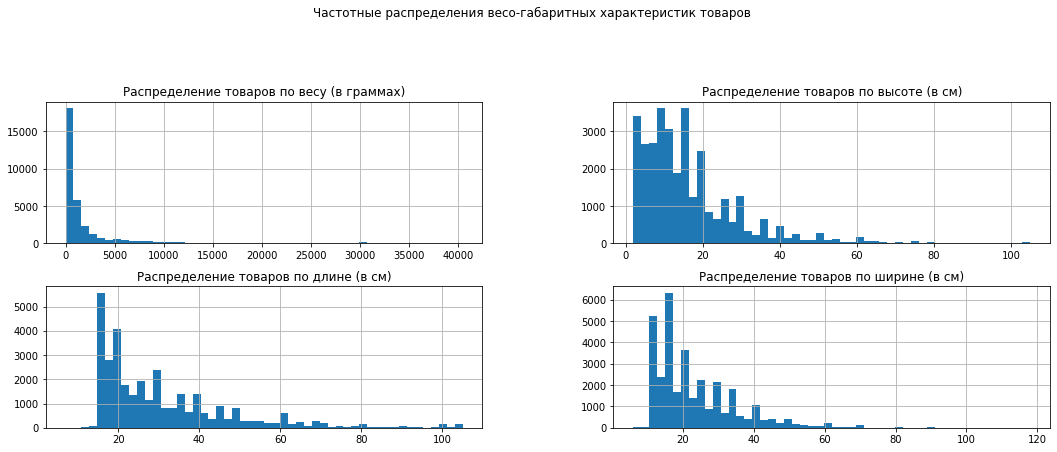

In [65]:
# Частотные распределения весо-габаритных характеристик товаров
fig, axes = plt.subplots(2, 2, figsize=(18, 6))
products[['product_weight_g']].hist(bins=50, ax = axes[0,0])
axes[0,0].set_title('Распределение товаров по весу (в граммах)')

products[['product_length_cm']].hist(bins=50, ax = axes[1,0])
axes[1,0].set_title('Распределение товаров по длине (в см)')

products[['product_height_cm']].hist(bins=50, ax = axes[0,1])
axes[0,1].set_title('Распределение товаров по высоте (в см)')

products[['product_width_cm']].hist(bins=50, ax = axes[1,1])
axes[1,1].set_title('Распределение товаров по ширине (в см)')
plt.suptitle('Частотные распределения весо-габаритных характеристик товаров', y=0.95)
plt.show()

In [17]:
# Строки (610), не содержащие названия категории продуктов
# products[products['product_category_name'].isnull()]

In [101]:
# Кол-во товаров в категориях:
list_category_name = products.groupby('product_category_name').count()[['product_id']].sort_values('product_id', ascending=False).reset_index()
list_category_name.head()
# products['product_category_name'].value_counts().head()

,product_category_name,product_id
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335


In [61]:
# Дубли записей отсутствуют
products.duplicated().sum()

0

#### Sellers

In [11]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [24]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [78]:
# Пропуски в данных отсутствуют
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


* **seller_id** - уникальный идентификатор продавца
* **seller_zip_code_prefix** - первые 5 цифр почтового индекса продавца
* **seller_city** - название города продавца
* **seller_state** - сокр. название штата продавца

In [69]:
# Кол-во уникальных значений
sellers.describe(include = object)
# Уникальных продавцов: 3095
# Городов продавцов: 611 (Сан-Паулу - наиболее встречающийся)
# Штатов продавцов: 23 (Сан-Паулу - наиболее встречающийся)

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,58e4b302b54937e55a678c4d15111da4,sao paulo,SP
freq,1,694,1849


In [63]:
# Дубли записей отсутствуют
sellers.duplicated().sum()

0

#### Category

In [12]:
category = pd.read_csv('product_category_name_translation.csv')

In [96]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [97]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


* **product_category_name** - название категории продукта (на португальском)
* **product_category_name_english** - название категории продукта (на английском

In [102]:
# В списке категорий (на английском языке) отсутствует 2 категории, представленные в products
# list_category_name (73 категории) и category (71 категория)
# list_category_name - получен из products
joined = list_category_name.merge(category, on='product_category_name', how='outer')
joined.tail(10)

,product_category_name,product_id,product_category_name_english
63,fraldas_higiene,12,diapers_and_hygiene
64,la_cuisine,10,la_cuisine
65,moveis_colchao_e_estofado,10,furniture_mattress_and_upholstery
66,portateis_cozinha_e_preparadores_de_alimentos,10,NaN
67,tablets_impressao_imagem,9,tablets_printing_image
68,casa_conforto_2,5,home_comfort_2
69,fashion_roupa_infanto_juvenil,5,fashion_childrens_clothes
70,pc_gamer,3,NaN
71,seguros_e_servicos,2,security_and_services
72,cds_dvds_musicais,1,cds_dvds_musicals


In [101]:
# Эти категории:
joined[joined['product_category_name_english'].isnull()]

,product_category_name,product_id,product_category_name_english
66,portateis_cozinha_e_preparadores_de_alimentos,10,NaN
70,pc_gamer,3,NaN


In [103]:
# Заменим отсутствующие значения
joined.loc[joined['product_category_name'] == 'pc_gamer','product_category_name_english'] = 'pc_games'
joined.loc[joined['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos',\
           'product_category_name_english'] = 'portable_kitchen_appliances'

In [103]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(joined)

,product_category_name,product_id,product_category_name_english
0,cama_mesa_banho,3029,bed_bath_table
1,esporte_lazer,2867,sports_leisure
2,moveis_decoracao,2657,furniture_decor
3,beleza_saude,2444,health_beauty
4,utilidades_domesticas,2335,housewares
5,automotivo,1900,auto
6,informatica_acessorios,1639,computers_accessories
7,brinquedos,1411,toys
8,relogios_presentes,1329,watches_gifts
9,telefonia,1134,telephony


In [104]:
category_name = joined.loc[:,['product_category_name', 'product_category_name_english']]
# category_name.info()

In [132]:
category_name.to_csv('category_name.csv')

In [110]:
# Дубли записей отсутствуют
category.duplicated().sum()

0

**Объединяем данные для совместного анализа**

In [12]:
# orders = pd.read_csv('olist_orders_dataset.csv')

In [106]:
join_1 = order_items.merge(orders, on='order_id', how='left')
join_2 = join_1.merge(products, on='product_id', how='left')
join_3 = join_2.merge(customers, on='customer_id', how='left')
join_4 = join_3.merge(order_payments, on='order_id', how='left')
df = join_4.merge(order_reviews, on='order_id', how='left')

In [14]:
# df.info()

In [107]:
# Изменим форматирование дат на datetime:
columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at',\
                'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',\
               'review_creation_date', 'review_answer_timestamp']
for col in columns:
    df[col] = pd.to_datetime(df[col])
# orders.dtypes

In [159]:
# df.info()

In [177]:
# Общее кол-во пропущенных значений по столбцам:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_comment_title             104229
review_comment_message            67650
dtype: int64

In [130]:
# Примеры заказов, по которым нет данных в order_items - это отмененный заказ и отсутствующий товар
# orders[orders['order_id'].isin(['a69ba794cc7deb415c3e15a0a3877e69', '3a3cddda5a7c27851bd96c3313412840'])]
# order_items[order_items['order_id'].isin(['a69ba794cc7deb415c3e15a0a3877e69', '3a3cddda5a7c27851bd96c3313412840'])]

In [108]:
# Преобразуем данные, добавив в т.ч. несколько столбцов:
df = df.rename({'order_purchase_timestamp': 'date_purchase', 'review_answer_timestamp': 'review_answer'}, axis=1)
# df.head()

In [109]:
# Год
df['year'] = df.date_purchase.dt.year

In [110]:
# Дату, без года
df['day_purchase'] = df.date_purchase.dt.date

In [111]:
# День недели 
df['weekday'] = df.date_purchase.dt.dayofweek # где 0 - пн., 6 - вс. 
# df['weekday'] = df['weekday'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

In [112]:
# Пару год-месяц
df['year_month'] = df['day_purchase'].apply(lambda x:x.strftime('%Y_%m'))

In [113]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,date_purchase,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer,year,day_purchase,weekday,year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.3,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.2,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,2017,2017-09-13,2,2017_09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.9,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.8,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13,2017-05-15 11:34:13,2017,2017-04-26,2,2017_04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.9,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.9,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,2018,2018-01-14,6,2018_01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13.0,12.8,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.8,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15,2018-08-15 16:39:01,2018,2018-08-08,2,2018_08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.0,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,2017,2017-02-04,5,2017_02


In [114]:
# Дубли записей отсутствуют
df.duplicated().sum()

0

In [115]:
# Отберем актуальные заказы:
actual_orders = df[~df['order_status'].isin(['canceled', 'unavailable'])]

In [22]:
# actual_orders.info()
actual_orders.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,year,weekday
count,117741.0,117741.0,117741.0,116047.0,116047.0,116047.0,117721.0,117721.0,117721.0,117721.0,117741.0,117738.0,117738.0,117738.0,117741.0,117741.0,117741.0
mean,1.2,120.4,20.0,48.8,786.0,2.2,2112.3,30.3,16.6,23.1,35086.2,1.1,2.9,172.1,4.0,2017.5,2.7
std,0.7,183.0,15.8,10.0,652.4,1.7,3786.8,16.2,13.4,11.7,29829.4,0.7,2.8,265.6,1.4,0.5,2.0
min,1.0,0.8,0.0,5.0,4.0,1.0,0.0,7.0,2.0,6.0,1003.0,1.0,0.0,0.0,1.0,2016.0,0.0
25%,1.0,39.9,13.1,42.0,346.0,1.0,300.0,18.0,8.0,15.0,11320.0,1.0,1.0,60.9,4.0,2017.0,1.0
50%,1.0,74.9,16.3,52.0,601.0,1.0,700.0,25.0,13.0,20.0,24322.0,1.0,2.0,108.2,5.0,2018.0,3.0
75%,1.0,134.0,21.2,57.0,985.0,3.0,1800.0,38.0,20.0,30.0,58801.0,1.0,4.0,189.1,5.0,2018.0,4.0
max,21.0,6735.0,409.7,76.0,3992.0,20.0,40425.0,105.0,105.0,118.0,99990.0,29.0,24.0,13664.1,5.0,2018.0,6.0


In [55]:
# actual_orders.loc[actual_orders['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']
# leader_customers = actual_orders.loc[actual_orders['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']
# leader_customers.describe(include = object)

In [116]:
# Агрегируем по месяцам (годам, месяцам) и категориям товаров
# category_month = actual_orders.groupby(['product_category_name','year_month']).sum()[['price', 'freight_value', 'payment_value']].reset_index()
category_month = actual_orders.groupby(['product_category_name','year_month'])\
    .agg({'price': 'sum', 'freight_value': 'sum', 'payment_value': 'sum', 'customer_unique_id': 'count', \
          'order_id': 'count', 'review_score': 'mean'}).reset_index()
category_month.head()

,product_category_name,year_month,price,freight_value,payment_value,customer_unique_id,order_id,review_score
0,agro_industria_e_comercio,2017_01,66.0,41.8,169.2,3,3,4.3
1,agro_industria_e_comercio,2017_02,268.8,134.5,331.1,9,9,4.1
2,agro_industria_e_comercio,2017_03,82.0,28.7,110.7,2,2,2.0
3,agro_industria_e_comercio,2017_05,1579.9,183.8,1763.7,4,4,4.8
4,agro_industria_e_comercio,2017_06,1390.0,32.0,1422.0,1,1,1.0


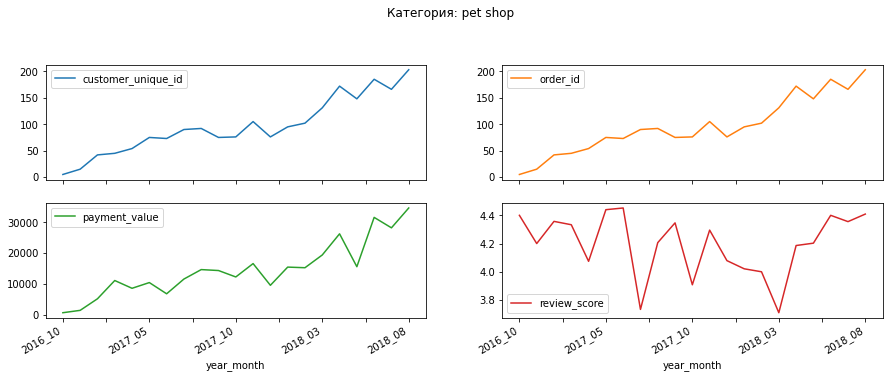

In [117]:
# Визуализируем динамику продаж и оценки удовлетворенности по категории (для примера: pet_shop)
# category_month.loc[category_month['product_category_name'] == 'pet_shop'].\
#     plot(y=['price', 'customer_unique_id', 'freight_value', 'order_id', 'payment_value', 'review_score'], \
#         x='year_month', subplots=True, layout=(3,2), figsize=(15, 8))
category_month.loc[category_month['product_category_name'] == 'pet_shop'].\
    plot(y=['customer_unique_id', 'order_id', 'payment_value', 'review_score'], \
         x='year_month', subplots=True, layout=(3,2), figsize=(15, 8))
plt.suptitle('Категория: pet shop', fontsize=12)
plt.show()

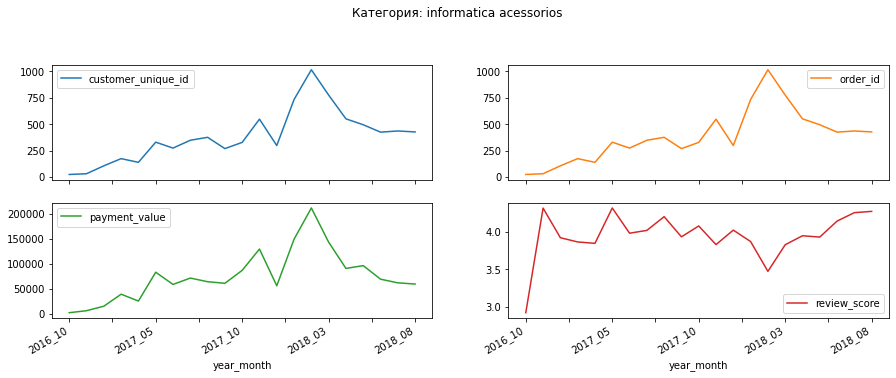

In [118]:
# По любой другой категории (informatica_acessorios)
# Динамика продаж, как и оценок удовлетворенности, в зависимости от категории различаются 
# category_month.loc[category_month['product_category_name'] == 'informatica_acessorios'].\
#     plot(y=['price', 'customer_unique_id', 'freight_value', 'order_id', 'payment_value', 'review_score'], \
#          x='year_month', subplots=True, layout=(3,2), figsize=(15, 8))
category_month.loc[category_month['product_category_name'] == 'informatica_acessorios'].\
    plot(y=['customer_unique_id', 'order_id', 'payment_value', 'review_score'], \
         x='year_month', subplots=True, layout=(3,2), figsize=(15, 8))
plt.suptitle('Категория: informatica acessorios', fontsize=12)
plt.show()

In [33]:
# category_month.loc[category_month['product_category_name'] == 'informatica_acessorios']

In [119]:
# Агрегируем по месяцам
# Данные за ноябрь 2016 г. отсутствуют (магазин запускал новую версию платформы)
all_month = actual_orders.groupby(['year_month']).agg({'price': 'sum', 'freight_value': 'sum', 'payment_value': 'sum', \
                                                       'customer_unique_id': 'count', 'order_id': 'count', \
                                                       'review_score': 'mean'}).reset_index()
all_month.head()

,year_month,price,freight_value,payment_value,customer_unique_id,order_id,review_score
0,2016_09,207.9,71.8,272.5,5,5,1.0
1,2016_10,46468.6,7228.1,68527.7,365,365,3.7
2,2016_12,10.9,8.7,19.6,1,1,5.0
3,2017_01,129680.7,18104.4,189325.0,1021,1021,4.1
4,2017_02,259670.2,41259.2,343562.1,2058,2058,4.1


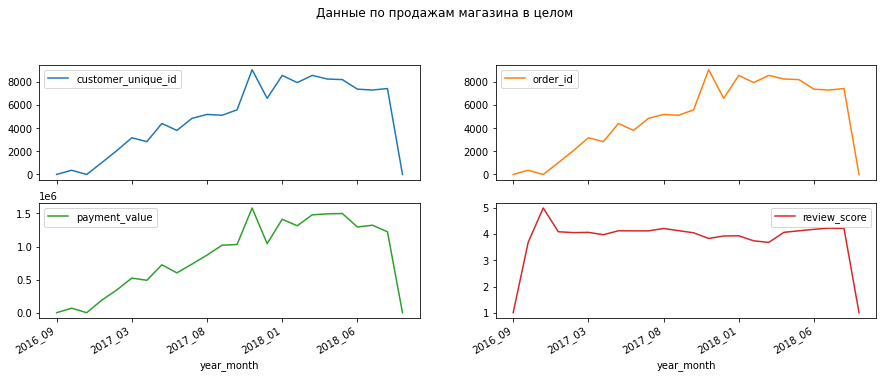

In [27]:
# Визуализируем динамику продаж и оценки удовлетворенности покупками в магазине
# Фактически, в январе 2018 г. продажи вышли на плато и больше не растут
# Данные за ноябрь 2016 отсутствуют (магазин запускал новую версию платформы), за декабрь 2016, сентябрь 2018 - по одному заказу
# В дальнейшем можно ограничиться периодом январь 2017 - август 2018
all_month.plot(y=['customer_unique_id', 'order_id', 'payment_value', 'review_score'], \
         x='year_month', subplots=True, layout=(3,2), figsize=(15, 8))
plt.suptitle('Данные по продажам магазина в целом', fontsize=12)
plt.show()

# all_month.plot(y=['price', 'freight_value'], x='year_month', subplots=True, layout=(2,1))

In [36]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(all_month)

In [120]:
# Агрегируем по дням недели
all_weekday = actual_orders.groupby(['weekday']).\
    agg({'price': 'sum', 'freight_value': 'sum', 'payment_value': 'sum', 'customer_unique_id': 'count',\
         'order_id': 'count', 'review_score': 'mean'}).reset_index()
all_weekday.head()

,weekday,price,freight_value,payment_value,customer_unique_id,order_id,review_score
0,0,2306692.1,383653.2,3289098.9,19128,19128,4.0
1,1,2269337.3,377467.4,3319082.4,19091,19091,4.0
2,2,2216447.1,370824.7,3155384.0,18401,18401,4.1
3,3,2111425.8,351828.3,3079303.4,17607,17607,4.0
4,4,2044760.3,334235.6,3013460.3,16812,16812,4.0


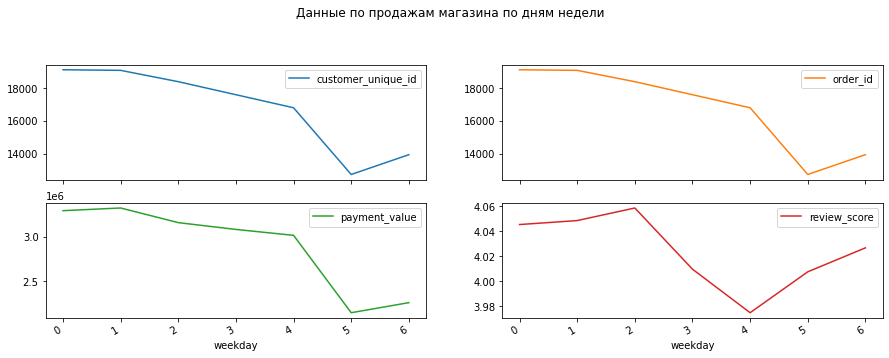

In [121]:
# Визуализируем динамику продаж по дням недели (где 0 - пн., 6 - вс.)
all_weekday.plot(y=['customer_unique_id', 'order_id', 'payment_value', 'review_score'], \
         x='weekday', subplots=True, layout=(3,2), figsize=(15, 8))
plt.suptitle('Данные по продажам магазина по дням недели', fontsize=12)
plt.show()
# В среднем, самые высокие продажи - во вторник, понедельник уступает незначительно
# Со среды по пятницу продажи сокращаются и достигают минимума в субботу
# Самое низкое среднее значение показателя удовлетворенности - для покупок, совершенных в пятницу  

In [122]:
# Агрегируем по дням недели и категориям товаров
category_weekday = actual_orders.groupby(['product_category_name','weekday']).\
    agg({'price': 'sum', 'freight_value': 'sum', 'payment_value': 'sum', 'customer_unique_id': 'count',\
         'order_id': 'count', 'review_score': 'mean'}).reset_index()
category_weekday.head()

,product_category_name,weekday,price,freight_value,payment_value,customer_unique_id,order_id,review_score
0,agro_industria_e_comercio,0,10126.6,1005.8,13018.4,35,35,4.3
1,agro_industria_e_comercio,1,8768.4,925.3,10537.5,34,34,4.0
2,agro_industria_e_comercio,2,24273.0,1790.3,19085.4,68,68,4.3
3,agro_industria_e_comercio,3,11445.7,821.2,14123.5,35,35,4.3
4,agro_industria_e_comercio,4,16784.2,1379.0,47629.1,49,49,4.1


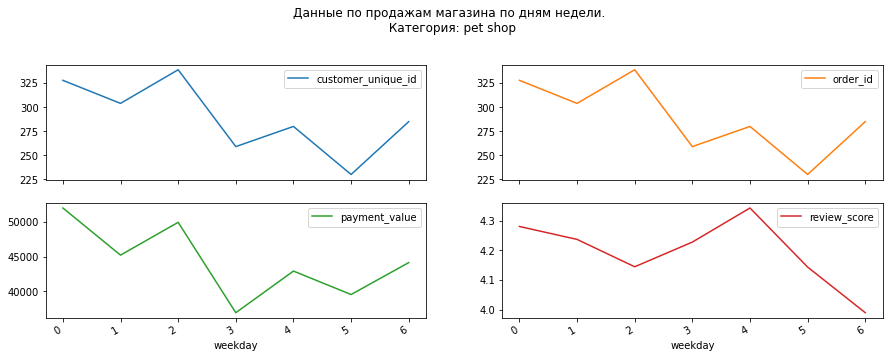

In [123]:
# Визуализируем динамику продаж в категории (для примера: pet_shop) по дням недели (где 0 - пн., 6 - вс.)
category_weekday.loc[category_weekday['product_category_name'] == 'pet_shop'].\
    plot(y=['customer_unique_id', 'order_id', 'payment_value', 'review_score'], \
         x='weekday', subplots=True, layout=(3,2), figsize=(15, 8))
plt.suptitle('Данные по продажам магазина по дням недели. \n Категория: pet shop', fontsize=12)
plt.show()


In [124]:
# Посчитаем средний чек по месяцам
all_month['average_check'] = all_month['payment_value'] / all_month['order_id']
all_month.head()

,year_month,price,freight_value,payment_value,customer_unique_id,order_id,review_score,average_check
0,2016_09,207.9,71.8,272.5,5,5,1.0,54.5
1,2016_10,46468.6,7228.1,68527.7,365,365,3.7,187.7
2,2016_12,10.9,8.7,19.6,1,1,5.0,19.6
3,2017_01,129680.7,18104.4,189325.0,1021,1021,4.1,185.4
4,2017_02,259670.2,41259.2,343562.1,2058,2058,4.1,166.9


In [125]:
# Если ограничиться периодом с января 2017 по август 2018, то средний чек составит 172 BRL
all_month[3:23]['average_check'].describe()

count    20.0
mean    171.8
std      11.4
min     151.4
25%     164.8
50%     170.1
75%     181.1
max     199.2
Name: average_check, dtype: float64

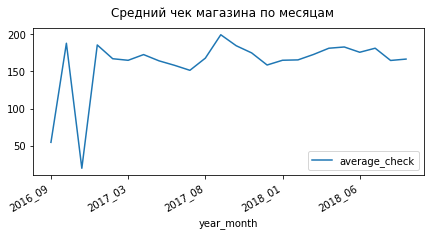

In [126]:
# Визуализируем динамику среднего чека магазина по месяцам
# За исключением пика в сентябре 2017 значение среднего чека по месяцам различается незначительно
all_month.plot(y=['average_check'], x='year_month', subplots=True, layout=(1,1), figsize=(7, 3))
plt.suptitle('Средний чек магазина по месяцам', fontsize=12)
plt.show()

In [127]:
# Посчитаем средний чек по категориям и месяцам
category_month['average_check'] = category_month['payment_value'] / category_month['order_id']
category_month.head()

,product_category_name,year_month,price,freight_value,payment_value,customer_unique_id,order_id,review_score,average_check
0,agro_industria_e_comercio,2017_01,66.0,41.8,169.2,3,3,4.3,56.4
1,agro_industria_e_comercio,2017_02,268.8,134.5,331.1,9,9,4.1,36.8
2,agro_industria_e_comercio,2017_03,82.0,28.7,110.7,2,2,2.0,55.3
3,agro_industria_e_comercio,2017_05,1579.9,183.8,1763.7,4,4,4.8,440.9
4,agro_industria_e_comercio,2017_06,1390.0,32.0,1422.0,1,1,1.0,1422.0


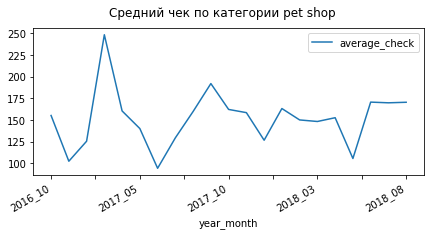

In [128]:
# Визуализируем динамику среднего чека по отдельной категории
category_month.loc[category_month['product_category_name'] == 'pet_shop'].\
    plot(y=['average_check'], x='year_month', subplots=True, layout=(1,1), figsize=(7, 3))
plt.suptitle('Средний чек по категории pet shop', fontsize=12)
plt.show()

In [129]:
# Агрегируем по категориям товаров
category_all = actual_orders.groupby('product_category_name')\
    .agg({'price': 'sum', 'freight_value': 'sum', 'payment_value': 'sum', 'customer_unique_id': 'count', 'order_id': 'count',\
          'review_score': 'mean'}).reset_index()
# Добавим расчет среднего чека
category_all['average_check'] = category_all['payment_value'] / category_all['order_id']

category_all.head()

,product_category_name,price,freight_value,payment_value,customer_unique_id,order_id,review_score,average_check
0,agro_industria_e_comercio,83841.9,6966.8,118730.6,252,252,4.2,471.2
1,alimentos,29969.5,7512.8,46261.0,525,525,4.2,88.1
2,alimentos_bebidas,16394.5,4756.9,27395.1,289,289,4.3,94.8
3,artes,24687.0,4174.4,30941.3,218,218,3.9,141.9
4,artes_e_artesanato,1814.0,370.1,2326.2,24,24,4.1,96.9


In [130]:
# Добавим англоязычные варианты названий категорий
category_all_en = category_all.merge(category_name, on='product_category_name', how='left')

In [131]:
# Топ категорий товаров по продажам
# category_all_en.sort_values('payment_value', ascending=False).head(10)

# Топ категорий товаров по оценке удовлетворенности покупкой
# category_all_en.sort_values('review_score', ascending=False).head(10)

# Топ категорий товаров по сумме среднего чека 
category_all_en.sort_values('average_check', ascending=False).head(10)

,product_category_name,price,freight_value,payment_value,customer_unique_id,order_id,review_score,average_check,product_category_name_english
61,pcs,242811.6,10562.8,279121.6,220,220,4.2,1268.7,computers
71,telefonia_fixa,58582.5,4713.5,205264.3,268,268,3.7,765.9,fixed_telephony
64,portateis_casa_forno_e_cafe,48945.7,2884.7,51229.3,78,78,4.3,656.8,small_appliances_home_oven_and_coffee
0,agro_industria_e_comercio,83841.9,6966.8,118730.6,252,252,4.2,471.2,agro_industry_and_commerce
29,eletrodomesticos_2,121284.8,12263.0,122468.6,268,268,4.2,457.0,home_appliances_2
55,moveis_escritorio,287042.7,71669.2,651556.9,1787,1787,3.5,364.6,office_furniture
68,sinalizacao_e_seguranca,21584.8,6536.0,68488.1,201,201,4.0,340.7,signaling_and_security
45,instrumentos_musicais,207243.2,19219.9,228704.3,708,708,4.2,323.0,musical_instruments
31,eletroportateis,199098.2,16690.7,223714.4,697,697,4.2,321.0,small_appliances
25,construcao_ferramentas_seguranca,41022.0,3901.2,61848.6,194,194,3.9,318.8,construction_tools_safety


In [54]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,date_purchase,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer,year,day_purchase,weekday,year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.3,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.2,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,2017,2017-09-13,2,2017_09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.9,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.8,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13,2017-05-15 11:34:13,2017,2017-04-26,2,2017_04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.9,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.9,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,2018,2018-01-14,6,2018_01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13.0,12.8,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.8,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15,2018-08-15 16:39:01,2018,2018-08-08,2,2018_08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.0,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,2017,2017-02-04,5,2017_02


In [59]:
# df.info()

In [62]:
# Добавим столбцы с расчетными показателями:
# Фактическая длительность доставки
df['duration_delivery'] = (df['order_delivered_customer_date'] - df['date_purchase'])/24
df['duration_delivery'] = df['duration_delivery'].astype('timedelta64[h]')

# Ожидаемая длительность доставки (сообщается покупателю)
df['expected_delivery'] = (df['order_estimated_delivery_date'] - df['date_purchase'])/24
df['expected_delivery'] = df['expected_delivery'].astype('timedelta64[h]')

# Разница в сроках ожидаемой и фактической доставки
df['difference_timing'] = df['expected_delivery'] - df['duration_delivery']

# Плотность груза (как агрегат весо-габаритных характеристик)
df['product_density'] = 1000*df['product_weight_g'] / (df['product_length_cm']*df['product_height_cm']*df['product_width_cm'])

In [93]:
# df.columns.tolist()
# df_ = df.drop(df.columns[[4, 9, 10, 11, 12, 13, 15, 23, 30, 32, 39]], axis=1)
df_ = df.drop(df.columns[[4, 10, 11, 12, 13, 15, 23, 39]], axis=1)

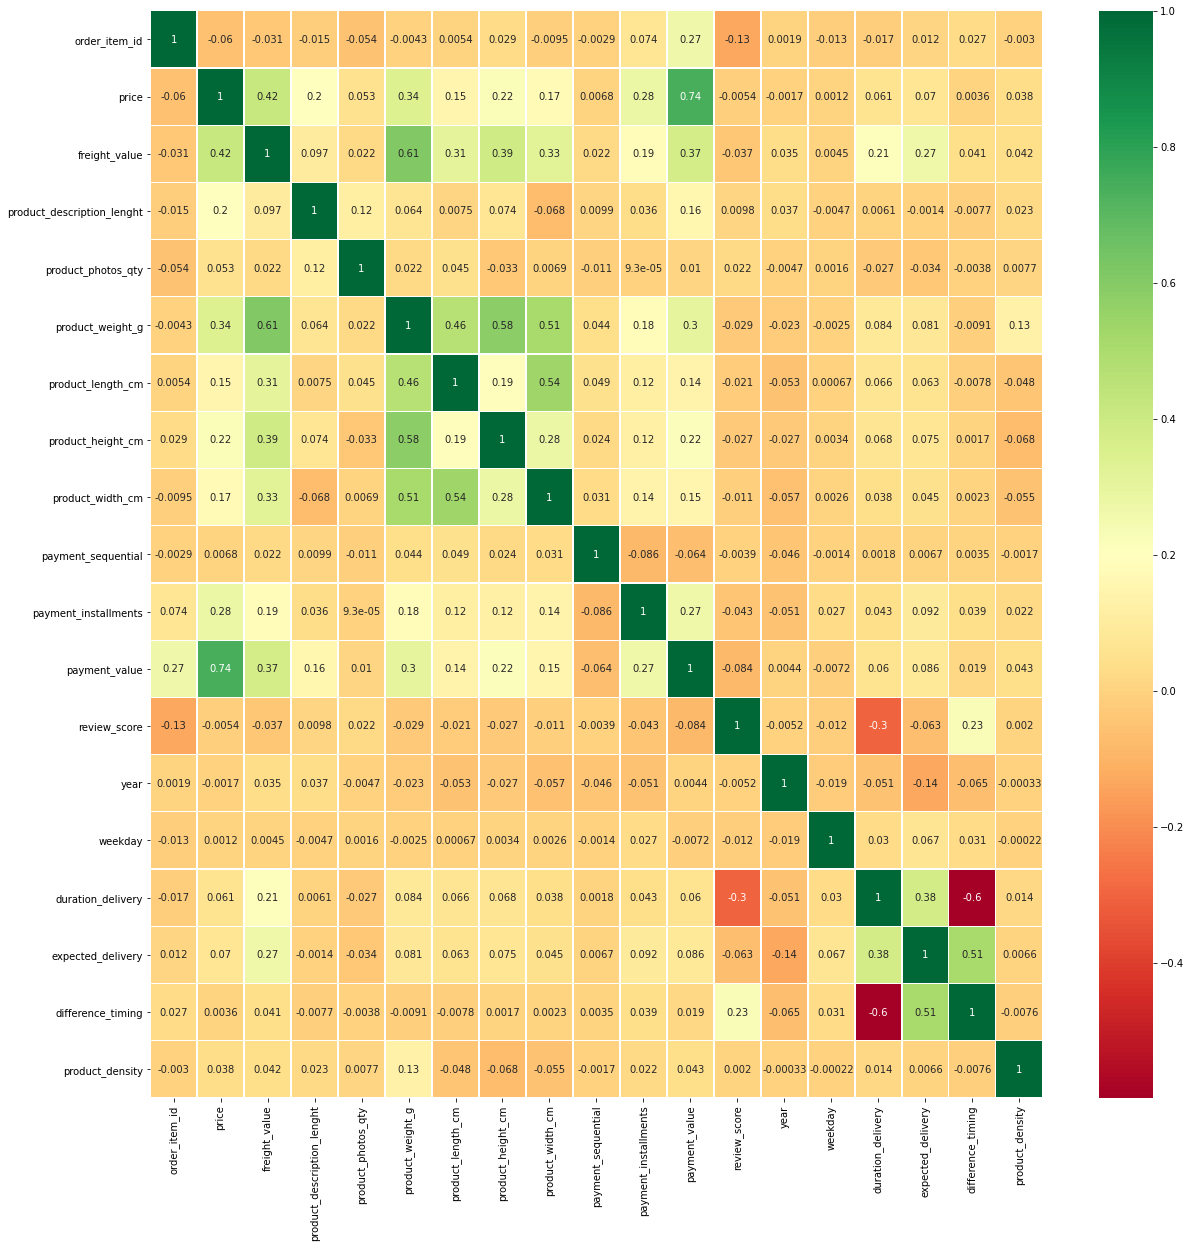

In [95]:
# Матрица корреляций переменных
# Из всех обнаруженных зависимостей можно выделить следующие:
# обратная зависимость между оценкой удовлетворенности (review_score) и фактическими сроками доставки (duration_delivery), 
# коэффициент корреляции: -0.3
# прямая зависимость между стоимостью фрахта (freight_value) и весом заказа (product_weight_g), 0.61
sns.heatmap(df_.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,20) 
plt.show()

#### Дополнительная информация по штатам Бразилии

In [ ]:
# Датасет содержит данные о покупательском поведении, но не содержит данных о самих покупателях
# Воспользуемся доступной статистической информацией по жителям штатов Бразилии, чтобы, возможно, использовать её при сегментации покупателей

In [85]:
states_of_brazil = pd.read_html('https://en.wikipedia.org/wiki/States_of_Brazil')[1]
#  Areas of the municipalities, Brazilian Institute of Geography and Statistics
# https://www.ibge.gov.br/en/cities-and-states/ac.html

In [86]:
states_of_brazil.rename(columns={'Flag and name':'Name','Largest city':'Largest_city','Area(km2)[1]':'Area',\
                                 'Population(2019)[2]':'Population','Density (perkm2, 2019)':'Density',\
                                 'GDP (R$millions, 2016)[3]': 'GDP', 'HDI(2017)[4]': 'HDI',}, inplace=True)

In [61]:
states_of_brazil.head()

,Name,Code,Capital,Largest_city,Area,Population,Density,GDP,HDI
0,Acre,AC,Rio Branco,Rio Branco,164124,881935,5.37,13751,0.719
1,Alagoas,AL,Maceió,Maceió,27843,3337357,119.86,49456,0.683
2,Amapá,AP,Macapá,Macapá,142471,845731,5.94,14339,0.740
3,Amazonas,AM,Manaus,Manaus,1559168,4144597,2.66,89017,0.733
4,Bahia,BA,Salvador,Salvador,564723,14873064,26.34,258649,0.714


* **Name** - Name of states
* **Area** - Areas of the municipalities, sq.km
* **Population** - Population Estimate, people (2019)
* **Density** - Population density is a ratio of the average number of inhabitants per square kilometre, inhab sq.km (2019)
* **GDP** - a gross domestic product (GDP), BRL millions (2016)
* **HDI** - Human Development Index - is a composite statistic of education, income and longevity indices, calculated in order to measure social and economic development within countries. It consists of a number between 0 and 1, comprising five tiers of human development—very low, low, medium, high, or very high—wherein the development is considered higher when closer to 1.
* **Monthly_household** - Monthly household income per capita, BRL (2017)
* **Total_vehicles** - Total vehicles, vehicles (2017)

In [51]:
states_of_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          27 non-null     object 
 1   Code          27 non-null     object 
 2   Capital       27 non-null     object 
 3   Largest_city  27 non-null     object 
 4   Area          27 non-null     int64  
 5   Population    27 non-null     int64  
 6   Density       27 non-null     float64
 7   GDP           27 non-null     int64  
 8   HDI           27 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.0+ KB


In [18]:
Regions = {'DF':'Center-West', 'GO':'Center-West', 'MT':'Center-West', 'MS':'Center-West',\
          'AC':'North', 'AP':'North', 'AM':'North', 'PA':'North', 'RO':'North', 'RR':'North', 'TO':'North',\
          'AL':'Northest', 'BA':'Northest', 'CE':'Northest', 'MA':'Northest', 'PB':'Northest', 'PE':'Northest',\
           'PI':'Northest', 'RN':'Northest', 'SE':'Northest', 'PR':'South', 'RS':'South', 'SC':'South',\
           'ES':'Southest', 'MG':'Southest', 'RJ':'Southest', 'SP':'Southest'}

In [21]:
states_of_brazil['Region'] = states_of_brazil['Code'].map(Regions)

In [27]:
states_of_brazil.head()

,Name,Code,Capital,Largest_city,Area,Population,Density,GDP,HDI,Region
0,Acre,AC,Rio Branco,Rio Branco,164124,881935,5.37,13751,0.719,North
1,Alagoas,AL,Maceió,Maceió,27843,3337357,119.86,49456,0.683,Northest
2,Amapá,AP,Macapá,Macapá,142471,845731,5.94,14339,0.740,North
3,Amazonas,AM,Manaus,Manaus,1559168,4144597,2.66,89017,0.733,North
4,Bahia,BA,Salvador,Salvador,564723,14873064,26.34,258649,0.714,Northest


In [24]:
states_of_brazil.to_excel('states_of_brazil.xlsx')

### Marketing Funnel by Olist

In [2]:
# How to join Marketing Funnel Dataset with Brazilian E-Commerce Public Dataset
# https://www.kaggle.com/andresionek/joining-marketing-funnel-with-brazilian-e-commerce

#### Closed deals

In [37]:
# closed_deals = pd.read_csv('olist_closed_deals_dataset.csv')

In [1]:
# closed_deals.head()

In [2]:
# closed_deals.info()

* **mql_id** - идентификатор MQL (Marketing Qualified Lead)
* **seller_id** - уникальный идентификатор продавца
* **sdr_id** - идентификатор SDR (Sales Development Representative)
* **sr_id** - идентификатор SR (Sales Development Representative)
* **won_date** - дата закрытия сделки
* **business_segment** - бизнес-сегмент лида (выясняется при контакте)
* **lead_type** - тип лида (выясняется при контакте)
* **lead_behaviour_profile** - поведенческий профиль лида (SDR идентифицирует при контакте)
* **has_company** - наличие у лида компании
* **has_gtin** - наличие у продукции лида штрих-кодов (Global Trade Item Number (barcode))
* **average_stock** - средний запас у лида (выясняется при контакте)
* **business_type** - тп бизнеса лида (производитель / продавец )
* **declared_product_catalog_size** - размер каталога  у лида (выясняется при контакте)
* **declared_monthly_revenue** - ежемесячная выручка у лида (выясняется при контакте)

In [3]:
# Данные о выручке по лидам отсутствуют
# n, bins, patches = plt.hist(closed_deals['declared_monthly_revenue'], 100)

# plt.xlabel('declared_monthly_revenue')
# plt.ylabel('frecuency')
# plt.title('Частотный график declared_monthly_revenue \n (разбиение интервала по 100 элементов)')
# plt.grid(True)
# plt.show()

#### Marketing qualified

In [4]:
# marketing_qualified = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

In [5]:
# marketing_qualified.head()

In [6]:
# marketing_qualified.info()

* **mql_id** - идентификатор MQL (Marketing Qualified Lead)
* **first_contact_date** - дата первого запроса на контакт
* **landing_page_id** - идентификатор посадочной страницы
* **origin** - тип медиа с посадочной страницей, где был приобретен лид

In [7]:
# marketing_qualified['origin'].value_counts()